# CLASE 1.5: APLICACIONES EN LA CONSTRUCCIÓN DE MODELOS.
---

## Aplicación Nº1: Modelo de regresión lineal.

### Conceptos preliminares.
En cualquier carrera de ingeniería, siempre habrá una asignatura dedicada a la estimación de parámetros. Y entre los contenidos a revisar, siempre estará el **modelo de regresión lineal**, el cual a su vez corresponde a un método ampliamente utilizado para encontrar una relación (de tipo lineal) entre una variable dependiente (o de respuesta) y una o más variables independientes (o explicativas). Dicho modelo es sencillo y poco costoso de computar, y capaz de abordar muchísimos problemas cotidianos (exceptuando por supuesto a los más complejos). Asimismo, corresponde a la punta de lanza de los algoritmos de aprendizaje (o de *machine learning*), y en su forma más simple (donde sólo disponemos de una variable independiente), puede escribirse como una combinación lineal sencilla del tipo $y=\theta_{0} +\theta_{1}x$. Esto es una función lineal del parámetro de entrada $x$, donde $\theta_{0}$ y $\theta_{1}$ son los llamados **parámetros** del modelo.

De forma más general, un modelo lineal realiza una predicción simplemente mediante el cálculo de una suma ponderada de los atributos de entrada que nos interesan en términos de los mencionados parámetros del modelo, más un término constante conocido como **parámetro de sesgo**, que podemos escribir como

<p style="text-align: center;">$\hat{y} =\theta_{0} +{\displaystyle \sum^{N}_{j=1} \theta_{j} x_{j}}$</p>
</p> <p style="text-align: right;">$(5.1)$</p>

Donde,

- $\hat{y}$ es el valor predicho (estimado).
- $n$ es el número de variables del modelo.
- $x_{j}$ es el valor de la 𝑗-ésima variable.
- $\theta_{j}$ es el 𝑗-ésimo parámetro del modelo (incluyendo el término de sesgo $\theta_{0}$ y los pesos o ponderadores de cada atributo $\theta_{1},...,\theta_{n}$).

En términos geométricos, la implementación de un modelo de regresión lineal es equivalente al ajuste de una línea sobre los puntos que representan la correspondencia entre los valores de la(s) variable(a) independiente(s) y la correspondiente variable dependiente. Tal proceso de ajuste se ilustra en el gráfico construido en el siguiente bloque de código para el caso unidimensional (es decir, cuando queremos ajustar un modelo dependiente de una única variable).

In [1]:
import numpy as np

In [2]:
# Importamos la función tqdm() del módulo tqdm para crear barras de progreso.
from tqdm import tqdm

In [3]:
# Semilla aleatoria fija.
rng = np.random.default_rng(42)

In [4]:
# Creamos algo de data aleatoria.
X_real = np.linspace(start=0, stop=16, num=50) # Vector de valores independientes observados.
a_real, b_real = -50.1, 2200
Y_real = a_real*X_real + b_real

In [5]:
# Agregamos algo de ruido Gaussiano.
w1 = rng.normal(loc=180, scale=80, size=50)
w2 = rng.normal(loc=140, scale=100, size=50)
Y_noise = Y_real + w1 - w2

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.rcParams["figure.dpi"] = 200
plt.style.use("bmh")

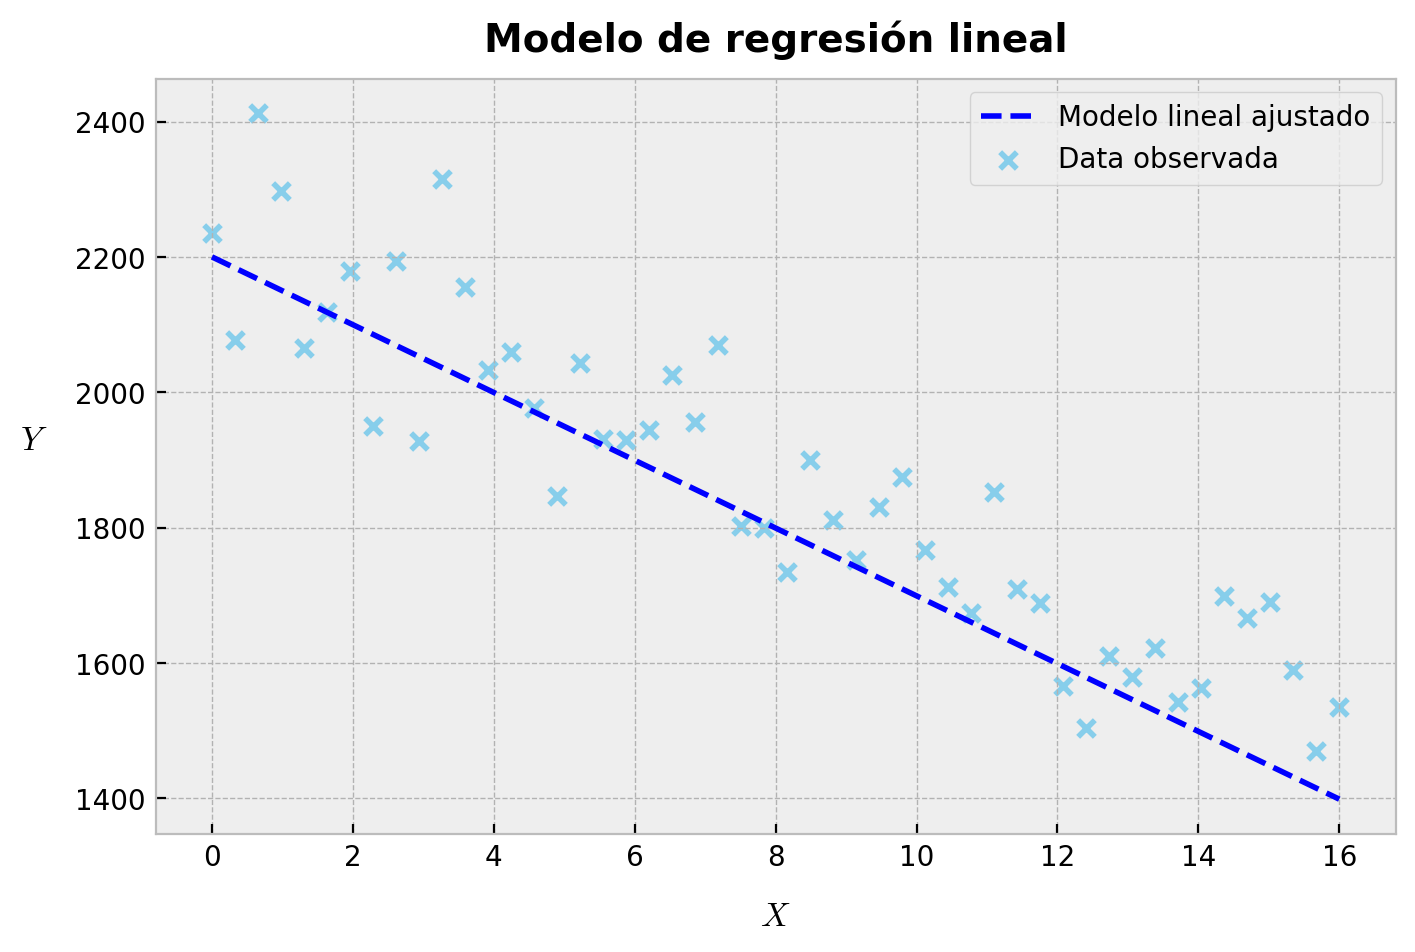

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_real, Y_noise, color="skyblue", marker="x", label="Data observada")
ax.plot(X_real, Y_real, "--b", label="Modelo lineal ajustado")
ax.set_xlabel(r"$X$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$Y$", fontsize=12, labelpad=15, rotation=0)
ax.set_title("Modelo de regresión lineal", fontsize=14, fontweight="bold", pad=10)
ax.legend(loc="best", frameon=True);

Ya que mencionamos el nombre (famoso, por cierto) de *”machine learning”*, es bueno que establezcamos algo de contexto y entendamos un poco qué queremos decir con dicho nombre. En términos generales. “machine learning” hace referencia a una serie de algoritmos que son capaces de aprender patrones a partir de los datos, sin la necesidad de que nosotros intervengamos en dicho proceso de aprendizaje, más que en el setting de ciertos parámetros inherentes al algoritmo escogido, que llamamos **hiperparámetros**. En el modelo de regresión lineal clásico, un hiperparámetro corresponde al valor del parámetro de sesgo del modelo, debido a que podemos optar siempre por usarlo o no. Otro elemento importante en los algoritmos de machine learning corresponde a la llamada **función de costo o de pérdida**, que es una función que permite mapear el desempeño del modelo resultante en términos de algún número real, que da cuenta de la calidad de dicho modelo.

La función de costo es importante en los algoritmos de machine learning, puesto que se trata de una guía absoluta que controla el ajuste de los parámetros propios del modelo a fin de lograr el mejor ajuste posible.
Finalmente, es bueno tener en consideración que siempre es buena idea particionar nuestro conjunto de datos a utilizar para construir nuestro modelo en tres diferentes subconjuntos, cada uno de los cuales sirve a un propósito bien determinado:

- **Conjunto de entrenamiento:** Consistente de los datos a utilizar para el ajuste del modelo. El esquema es sencillo: La data es presentada al modelo, y éste aprende a partir de dicha data.
- **Conjunto de validación:** Data apartada para testear las diferentes combinaciones posibles de hiperparámetros que pueden darse en un determinado tipo de algoritmo.
- **Conjunto de prueba:** Data utilizada para evaluar la calidad global del modelo en términos de su desempeño sobre datos nuevos, lo que nos da una idea relativa a su capacidad de generalizar información.

Es importante considerar que estos subconjuntos se muestrean siempre de manera independiente, de manera que los procesos previamente comentados no interfieran entre sí.

Como dijimos previamente, a fin de poder estimar la calidad de nuestro modelo, necesitamos de una función de costo, la cual nos permitirá guiar el proceso de ajuste de los parámetros del mismo. En el caso del modelo de regresión lineal, es común utilizar como función de costo al **error cuadrático medio (MSE)**, la cual mide las diferencias al cuadrado entre los valores predichos por el modelo y los valores reales de la variable de respuesta. Para un total de $M$ observaciones, consideremos la variable de respuesta $y\in \mathbb{R}^{m}$ y los valores predichos $\hat{y}\in \mathbb{R}^{m}$. El error cuadrático medio del modelo cuyas predicciones se agrupan en el vector $\hat{y}$ se define como

<p style="text-align: center;">$\mathrm{M} \mathrm{S} \mathrm{E} (\mathbf{y}|\hat{\mathbf{y}})  =\displaystyle \frac{1}{M} \sum^{M}_{i=1} ( \hat{y}_{i} -y_{i})^{2}$</p>
</p> <p style="text-align: right;">$(5.2)$</p>

Podemos expandir la Ec. (5.2) reemplazando la estimación $\hat{y}$ por el modelo de regresión lineal establecido en primera instancia, el cual podemos escribir en forma compacta como sigue:

<p style="text-align: center;">$\hat{\mathbf{y} } =\mathbf{\theta }^{\top } \mathbf{X} +b\  ;\  \mathbf{X} =\left( \mathbf{x}_{1} ,...,\mathbf{x}_{N} \right)  =\left( \begin{matrix}x_{11}&x_{12}&\cdots &x_{1N}\\ x_{21}&x_{22}&\cdots &x_{2N}\\ \vdots &\vdots &\ddots &\vdots \\ x_{M1}&x_{M2}&\cdots &x_{MN}\end{matrix} \right)  \in \mathbb{R}^{M\times N}$ </p> 
<p style="text-align: right;">$(5.3)$</p>

Donde,

- $\mathbf{\theta } =(\theta_{1} ,...,\theta_{N})\in \mathbb{R}^{N} $ es el vector que agrupa a todos los parámetros del modelo (un total de $N$, uno por cada variable).
- $\mathbf{X} =\left\{ x_{ij}\right\}  \in \mathbb{R}^{M\times N}$ es la matriz que agrupa a las $M$ observaciones de las $N$ variables $\mathbf{x}_{1},...,\mathbf{x}_{N}$ (donde cada una es un vector en $\mathbb{R}^{M}$).
- $b=\theta_{0}$ es el parámetro de sesgo del modelo.

Por lo tanto, reemplazando (5.3) en (5.2), obtenemos la siguiente expresión para nuestra función de costo:

<p style="text-align: center;">$\displaystyle \mathrm{M} \mathrm{S} \mathrm{E} \left( \mathbf{y} |\mathbf{x} ,\mathbf{\theta } \right)  =\frac{1}{M} \sum^{M}_{i=1} \left( y_{i}-\left( \mathbf{\theta }^{\intercal } \mathbf{x}_{i} +b\right)  \right)^{2}$ </p> 
<p style="text-align: right;">$(5.4)$</p>

El problema de ajustar el modelo a nuestra data corresponde, por tanto, a un problema de optimización, puesto que es equivalente a minimizar el valor del error cuadrático medio (MSE), dados los parámetros escogidos para el modelo y la información de entrada. Para resolver dicho problema, existen varios procedimientos. 

En términos algebraicos, el problema de minimización de la función (5.4) tiene una solución cerrada, que corresponde a su vez a la solución de un sistema lineal de ecuaciones conocidas como **ecuaciones normales**. Este método suele ser algo costoso en comparación a otros procedimientos iterativos más comunes en computación científica y que, además, tienen la ventaja de ser escalables. Uno de estos procedimientos corresponde al **algoritmo de gradiente descendente (GD)**.

El algoritmo de GD utiliza los parámetros del modelo ($\theta$ y $b$) para, a partir de valores iniciales de tales parámetros, actualizarlos conforme un procedimiento que depende del cálculo de las derivadas de la función de costo (el error cuadrático medio) con respecto a tales parámetros. Tales derivadas se agrupan en una estructura conocida como **gradiente** de la función de costo y que, en nuestro ejemplo, es un vector que agrupa a las derivadas parciales de la función de costo con respecto a los parámetros $\theta_{1},...,\theta_{N}$ y $b$, y se calculan como

<p style="text-align: center;">$\displaystyle \frac{\partial }{\partial \mathbf{\theta } } \left( \mathrm{M} \mathrm{S} \mathrm{E} \left( \mathbf{y} |\mathbf{x} ,\mathbf{\theta } \right)  \right)  =-\frac{2}{M} \sum^{M}_{i=1} \left( y_{i}-\left( \mathbf{\theta }^{\intercal } \mathbf{x}_{i} +b\right)  \right)  \mathbf{x}_{i} $ </p> 
<p style="text-align: center;">$\displaystyle \frac{\partial }{\partial b} \left( \mathrm{M} \mathrm{S} \mathrm{E} \left( \mathbf{y} |\mathbf{x} ,\mathbf{\theta } \right)  \right)  =-\frac{2}{M} \sum^{M}_{i=1} \left( y_{i}-\left( \mathbf{\theta }^{\intercal } \mathbf{x}_{i} +b\right)  \right) $ </p>  
<p style="text-align: right;">$(5.5)$</p>

Recordemos, de la asignatura de Cálculo Diferencial, que el gradiente de una función siempre apunta en la dirección de máxima pendiente positiva. En términos geométricos, esto significa que, si imaginamos que la función de costo describe una superficie, el gradiente de dicha función en un punto arbitrario apunta siempre en la dirección de mayor pendiente relativa a ese punto, en dirección ascendente.

El algoritmo de gradiente descendente utiliza este principio geométrico para optimizar funciones de costo mediante un proceso iterativo sencillo, donde siempre, a partir de una posición determinada en esta superficie (digamos $\mathbf{y}_{k}$), nos movemos en la dirección de máxima pendiente, pero en dirección descendente (invirtiendo el signo del gradiente). El tamaño del paso que damos es un factor del gradiente correspondiente, donde dicho factor, denotado como $\alpha$, es llamado **tasa de aprendizaje** del algoritmo. Por lo tanto, el proceso de actualización de parámetros propio de este algoritmo se escribe como

<p style="text-align: center;">$\displaystyle \begin{array}{lll}\mathbf{\theta }_{k+1} &=&\mathbf{\theta }_{k} -\alpha \displaystyle \frac{\partial }{\partial \mathbf{\theta }_{k} } \left( \mathrm{M} \mathrm{S} \mathrm{E} \left( \mathbf{y} |\mathbf{x} ,\mathbf{\theta }_{k} \right)  \right)  \\ b_{k+1}&=&b_{k}-\alpha \displaystyle \frac{\partial }{\partial b_{k}} \left( \mathrm{M} \mathrm{S} \mathrm{E} \left( \mathbf{y} |\mathbf{x} ,\mathbf{\theta }_{k} \right)  \right)  \end{array} $ </p>  
<p style="text-align: right;">$(5.6)$</p>

Donde $\mathbf{\theta}_{k+1}$ y $b_{k+1}$ son los valores actualizados de los parámetros del modelo en la iteración $k+1$. Por supuesto, el criterio de detención natural del algoritmo guarda relación con la diferencia relativa entre los parámetros $\mathbf{\theta}$ y $b$ en iteraciones sucesivas. Dado un valor de **tolerancia** (por ejemplo, de 0.001), si el algoritmo no obtiene un valor actualizado que exceda dicha tolerancia en una cantidad determinada iteraciones (llamada **paciencia** del algoritmo), éste se detendrá. Lo anterior, naturalmente, implica que el algoritmo puede no ser capaz de garantizar la determinación de una solución óptima global, puesto que una función puede tener muchos mínimos locales además del mínimo global. Afortunadamente, existen ciertas condiciones matemáticas que sí garantizan que la solución óptima encontrada por este algoritmo sea global, y que guardan relación con la función de costo propiamente tal (ésta debe ser convexa), pero que no exploraremos en detalle en estos apuntes.

En la Fig. (5.1) se observa un esquema animado del procedimiento realizado por el algoritmo de gradiente descendente a fin de hallar el mínimo global de una función.

![alt text](https://github.com/rquezadac/udd_data_analytics_lectures/blob/main/seccion_01_numpy/figures/fig_5_1.gif?raw=true "Logo Title Text 1")
<p style="text-align: center;">Fig. (5.1): Esquema de aplicación del algoritmo de gradiente descendente</p>

### Implementación en Numpy.
Vamos a construir una implementación sencilla del modelo de regresión lineal, aprovechando el procedimiento iterativo provisto por el algoritmo de gradiente descendente, utilizando para ello todo lo que hemos aprendido en **Numpy** y lo que ya sabemos de Python de nuestras asignaturas anteriores. Intentaremos asegurar que nuestro procedimiento sea escalable. Vale decir, que pueda aplicarse a cualquier tipo de problema que cumpla con la estructura típica requerida por el modelo de regresión lineal, y que sea independiente del número de variables y/o observaciones, dependiendo únicamente de los hiperparámetros que deseemos setear: El número de iteraciones, la tolerancia y la tasa de aprendizaje del algoritmo.

Partiremos considerando el hecho de que, en el procedimiento que hemos descrito para el algoritmo de gradiente descendente, hay un total de $N+1$ parámetros para $N$ variables en el modelo. Por esa razón, hicimos la diferenciación entre las derivadas parciales relativas a los parámetros que constituyen el vector $\theta$ y el parámetro de sesgo $b$. Podemos considerar únicamente el vector $\theta$, añadiendo el término de sesgo al inicio de dicho vector. De esta manera, para poder compatibilizar este vector con la matriz $\mathbf{X}$ a fin de realizar la multiplicación $\mathbf{\theta }^{\top } \mathbf{X}$, añadimos un vector únicamente con 1s como primera columna de $\mathbf{X}$.

Consideremos, para efectos de crear algo de data, una semilla aleatoria fija:

In [9]:
# Generamos una semilla aleatoria fija, para asegurar la reproducibilidad de nuestros resultados.
rng = np.random.default_rng(7)

Ahora construiremos una función para ajustar un modelo de regresión lineal a un conjunto de $N$ variables agrupadas en un arreglo bidimensional, considerando los hiperparámetros de tolerancia, tasa de aprendizaje y número de iteraciones como argumentos por defecto:

In [10]:
# Creamos una función que replique el algoritmo de gradiente descendente.
def fit_linear_regression(
    X: np.ndarray, 
    y: np.ndarray, 
    iterations: int = 100, 
    tolerance: float = 1e-5, 
    learning_rate: float = 0.5,
    random_state: float = 42,
) -> np.ndarray:
    """
    Una función sencilla que permite ajustar un modelo de regresión lineal a un conjunto
    de datos de dimensión arbitraria, considerando como método de ajuste un procedimiento
    iterativo basado en el algoritmo de gradiente descendente, inicializando aleatoriamente
    los parámetros del modelo.
    
    Parámetros:
    -----------
    X : Datos de entrada que deseamos ajustar, estructurados como un arreglo bidimensional
        de M observaciones y N variables.
    Y : Datos de salida que deseamos predecir, estructurados como un arreglo unidimensional
        de M observaciones.
    iterations : Número de iteraciones a probar en el modelo.
    tolerance : Tolerancia del modelo.
    learning_rate : Tasa de aprendizaje del modelo.
    random_state : Semilla aleatoria fija del modelo.
    
    Retorno:
    --------
    Un arreglo de Numpy que contiene el parámetro de sesgo como primer elemento, y los
    parámetros del modelo a continuación.
    """
    # Semilla aleatoria fija.
    rng = np.random.default_rng(random_state)
    
    # Añadimos una columna de 1s para considerar dentro de la estructura de datos.
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
  
    # Inicializamos los parámetros del modelo con valores aleatorios.
    weights = rng.random(size=(X.shape[1], 1))
    
    # Aplicamos el algoritmo de gradiente descendente por medio de un loop.
    for i in tqdm(range(iterations), desc="Generando ajuste de parámetros"):
        # Calculamos los valores predichos usando los parámetros del modelo.
        y_pred = X @ weights

        # Calculamos el error cuadrático medio (función de costo).
        loss = np.mean((y_pred - y) ** 2)

        # Detenemos el algoritmo en caso de que éste diverja.
        # (es decir, si el valor de la función de costo tiende a infinito).
        if np.isinf(loss):
            break

        # Calculamos el gradiente de la función de costo con respecto a los 
        # parámetros del modelo.
        gradient = 2 * X.T @ (y_pred - y) / X.shape[0]

        # Actualizamos los parámetros del modelo conforme la tasa de aprendizaje.
        weights -= gradient * learning_rate

        # Chequeamos si hemos alcanzado el valor de la tolerancia.
        if np.linalg.norm(gradient) < tolerance:
            break
  
    # Retornamos los parámetros encontrados.
    return weights

La función anterior define entonces el proceso de ajuste de un modelo de regresión lineal (potenciado por el algoritmo de gradiente descendente), dado un conjunto de datos de entrada representado por un arreglo bidimensional de $M$ filas (observaciones) y $N$ columnas (variables), y un conjunto de datos de respuesta a las variables de entrada. El código además se detiene en caso de que el algoritmo de gradiente descendente diverja (tienda a $+\infty$ o $-\infty$), o bien, cuando la diferencia entre el valor del error cuadrático medio en iteraciones sucesivas no es mayor que el valor de tolerancia especificado en la función. El procedimiento retorna, por tanto, el arreglo `weights`, que está conformado por el parámetro de sesgo y los coeficientes del modelo de regresión lineal.

A fin de poder separar nuestro conjunto de datos entre conjuntos de entrenamiento y de prueba, seguiremos un procedimiento sencillo. Mezclaremos todos los elementos de nuestro dataset de manera aleatoria, intentando mantener la reproducibilidad de dicha mezcla. Para ello, usaremos la función `np.random.shuffle()`, incorporada en una función construida para esta implementación. Notemos que una simple mezcla de un dataset no considera el orden de los elementos del mismo, lo que puede resultar incorrecto en data relativas a series de tiempo o que no esté balanceada. Tenemos entonces:

In [11]:
# Creamos una función para separar nuestro dataset.
def split_dataset(
    X: np.ndarray,
    y: np.ndarray,
    proportion: float,
    random_state: float,
) -> tuple:
    """
    Una función que separa un dataset en un conjunto de entrenamiento y un conjunto
    de prueba, sin considerar el order de los elementos que lo constituyen. Esta
    función debe usarse solamente cuando el conjunto de datos con el cual queremos
    trabajar está balanceado.
    
    Parámetros:
    -----------
    X : Datos de entrada que deseamos ajustar, estructurados como un arreglo bidimensional
        de M observaciones y N variables.
    y : Datos de salida que deseamos predecir, estructurados como un arreglo unidimensional
        de M observaciones.
    proportion : Proporción de datos que serán usados como data de prueba.
    random_state : Semilla aleatoria fija para asegurar la reproducibilidad del procedimiento.
    Retorno:
    --------
    Una tupla de arreglos, conformada por los conjuntos de entrenamiento y de prueba.
    """
    # Semilla aleatoria fija.
    rng = np.random.default_rng(random_state)
    
    # Concatenamos X e y para obtener el dataset completo.
    dataset = np.concatenate([X, y.reshape(-1, 1)], axis=1)
    
    # Generamos la mezcla de todos los valores en el dataset.
    np.random.shuffle(dataset)
    
    # Separamos entonces el dataset entre conjunto de entrenamiento y de prueba.
    train_size = int(len(dataset) * proportion)
    train_set = dataset[:train_size, :]
    test_set = dataset[train_size:, :]
    
    # Extraemos X e y en cada caso.
    X_train, X_test = train_set[:, :-1], test_set[:, :-1]
    y_train, y_test = train_set[:, -1], test_set[:, -1]
    
    # Retornamos los valores correspondientes.
    return X_train, X_test, y_train.reshape(-1, 1), y_test.reshape(-1, 1)

Ya estamos listos para implementar nuestro modelo. Para ello, crearemos algo de data de entrada, usando una semilla aleatoria fija. La variable de respuesta la calcularemos directamente a partir de la data de entrada, usando una relación lineal, de manera que conoceremos de antemano los coeficientes a los cuales debemos llegar con nuestro modelo. Sin embargo, añadiremos algo de ruido a nuestra variable de respuesta, a fin de dificultad un poco el proceso de ajuste y testear la capacidad de nuestro modelo de llegar a los parámetros correctos:

In [12]:
# Generamos algo de data aleatoria.
X = rng.random(size=(1000, 2))
y = X @ np.array([[2.5], [0.5]]) + rng.random()

En la Fig. (5.3) se observa la dispersión entre las variables que se agrupan en el arreglo X y la variable de respuesta y. Notemos que, en el bloque de código anterior, hemos definido que $\mathbf{y} =2.5\mathbf{x}_{1} +0.5\mathbf{x}_{2} +\mathrm{r} \mathrm{u} \mathrm{i} \mathrm{d} \mathrm{o}$. Por lo tanto, las variables `X` e `y` sí tienen una relación lineal aproximada y un modelo de regresión lineal debiese retornar los parámetros $\theta_{1}=2.5$ y $\theta_{2}=0.5$, más un parámetro de sesgo que debiese ser aproximadamente igual a la media del ruido uniforme añadido a `y`.

En la Fig. (5.2) se observa un gráfico de todos estos puntos.

![alt text](https://github.com/rquezadac/udd_data_analytics_lectures/blob/main/seccion_01_numpy/figures/fig_5_2.png?raw=true "Logo Title Text 1")
<p style="text-align: center;">Fig. (5.2): Conjunto de datos para los cuales ajustaremos un modelo</p>

Separamos nuestra data en conjuntos de entrenamiento y de prueba:

In [13]:
# Separamos en conjunto de entrenamiento y conjunto de prueba.
X_train, X_test, y_train, y_test = split_dataset(X=X, y=y, proportion=0.8, random_state=42)

En la Fig. (5.3) se observa cuáles datos conforman el conjunto de entrenamiento y de prueba.

![alt text](https://github.com/rquezadac/udd_data_analytics_lectures/blob/main/seccion_01_numpy/figures/fig_5_3.png?raw=true "Logo Title Text 1")
<p style="text-align: center;">Fig. (5.3): Conjuntos de entrenamiento y de prueba</p>

Aplicaremos nuestra función para ajustar un modelo de regresión lineal a esta data:

In [14]:
# Ajustamos un modelo de regresión lineal a esta data.
weights = fit_linear_regression(
    X_train, y_train, iterations=100, tolerance=1e-5, learning_rate=0.5
)

Generando ajuste de parámetros: 100%|█████████████| 100/100 [00:00<00:00, 7430.65it/s]


In [15]:
# Parámetros del modelo.
weights

array([[0.23412283],
       [2.49752696],
       [0.49765645]])

Vemos que nuestro modelo ha estimado que $\hat \theta_{1}=2.49739529$ y $\hat \theta_{2}=0.49809302$, lo que se aproxima bastante al valor real de estos parámetros. El parámetro de sesgo estimado por el modelo es $b=0.89489173$.

Para estimar la calidad del modelo, es necesario entender el contexto de aplicación del mismo. No entraremos en detalles en este tópico ahora mismo, pero sí podemos decir que una métrica de exactitud popular corresponde al coeficiente r-cuadrado, que determina la proporción de valores de la variable de respuesta que es predicha por la(s) variable(s) independiente(s). Este coeficiente puede calcularse rápidamente como

<p style="text-align: center;">$\displaystyle r^{2}=1-\frac{SS_{\mathrm{r} \mathrm{e} \mathrm{s} }}{SS_{\mathrm{t} \mathrm{o} \mathrm{t} }} \  ;\  SS_{\mathrm{r} \mathrm{e} \mathrm{s} }=\sum^{M}_{i=1} \left( y_{i}-\hat{y}_{i} \right)^{2}  \  \wedge \  SS_{\mathrm{t} \mathrm{o} \mathrm{t} }\sum^{M}_{i=1} \left( y_{i}-\bar{y} \right)^{2}$ </p>  
<p style="text-align: right;">$(5.7)$</p>

En las ecuaciones anteriores, $SS_{\mathrm{r} \mathrm{e} \mathrm{s}}$ es una cantidad conocida como suma cuadrada de los residuos del modelo. Corresponde a la suma de los términos de error que resultan de las diferencias relativas al cuadrado entre los valores reales ($y_{i}$) y los valores predichos por el modelo ($\hat y_{i}$), llamados comúnmente residuos del modelo. Por otro lado, $SS_{\mathrm{t} \mathrm{o} \mathrm{t}}$ es la suma total de cuadrados del modelo, consistentes en diferencias relativas de cada valor observado ($y_{i}$) y la media de todos esos valores ($\bar y_{i}$).

La fórmula anterior es fácilmente replicable en **Numpy**:

In [16]:
# Una función para calcular el r-cuadrado.
def squared_r(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Una función que, dados dos arreglos que representan los valores reales de una variable
    de respuesta y valores predichos para la misma mediante un modelo arbitrario, calcula
    el coeficiente r-cuadrado, a fin de obtener una métrica de desempeño para la exactitud
    de las predicciones de dicho modelo.
    
    Parámetros:
    -----------
    y_real : Arreglo de Numpy que representa los valores observados de una variable de respuesta.
    y_pred : Arreglo de Numpy que representa los valores predichos para esta variable de respuesta.
    
    Retorno:
    --------
    Número flotante que representa el valor del coeficiente r-cuadrado.
    """
    # Cálculo de la suma de cuadrados de los residuos.
    SS_res = np.sum((y_real - y_pred) ** 2)
    
    # Cálculo de la suma de cuadrados totales.
    SS_tot = np.sum((y_real - np.mean(y_real)) ** 2)
    
    # Cálculo del r-cuadrado.
    score = 1 - SS_res / SS_tot
    
    return score

Usamos esta función para calcular el coeficiente r-cuadrado:

In [17]:
# Obtenemos predicciones para nuestros datos.
y_train_pred = X_train @ weights[1:] + weights[0]
y_test_pred = X_test @ weights[1:] + weights[0]

# Desempeño del modelo en datos de entrenamiento.
r2_train = squared_r(y_train, y_train_pred)
r2_test = squared_r(y_test, y_test_pred)

# Imprimimos en pantalla estos valores.
print(f"R-cuadrado sobre datos de entrenamiento ={r2_train}")
print(f"R-cuadrado sobre datos de prueba ={r2_test}")

R-cuadrado sobre datos de entrenamiento =0.9999982107429616
R-cuadrado sobre datos de prueba =0.9999983339411933


Ambos valores del coeficiente r-cuadrado son muy cercanos a 1 en ambos conjuntos de datos, lo que implica que nuestro modelo, además de haber hecho un buen ajuste de los datos, es capaz de generalizar esta información sobre los datos de prueba.

No está demás decir que, si bien nuestro código es perfectamente escalable a cualquier número de variables, debemos tener en consideración que:

- La data que hemos trabajado merece el apelativo de *data de juguete (o toyset)*, debido a que la hemos generado precisamente para la ocasión. En el mundo real, los conjuntos de datos a los que nos veremos enfrentados tendrán diferentes unidades variable a variable, registros sin data, datos anómalos (outliers), entre otras posibles características que harán de su manipulación algo mucho más importante que simplemente construir un modelo. Por lo tanto, no deberíamos estar ansiosos de hacer modelos y llegar a resultados tan perfectos *a la primera*.
- En general, los modelos de regresión lineal son sensibles a las magnitudes de los datos. Por lo tanto, siempre es un buen procedimiento escalar nuestra data antes de proceder a construir modelos que se ajusten a ella. Esto lo podemos hacer mediante procedimientos tales como normalización o estandarización, que ya revisamos al estudiar el concepto de broadcasting.

## Aplicación Nº2: Modelo de regresión logística binaria.
Vamos a finalizar esta sección comentando uno de los modelos más ingeniosos para la resolución de un tipo de problema muy conocido en machine learning conocido como **problema de clasificación binaria**. Este problema es similar al problema típico de regresión: Disponemos de una serie de variables independientes que constituyen información de entrada para modelar una variable de respuesta determinada, con la diferencia de que dicha variable de respuesta es binaria: Toma únicamente dos valores, típicamente codificados como 1 o 0, los que suelen representar datos de tipo categórico tales como “éxito” o “fracaso”, “verdadero” o “falso”, “fallo” o “no fallo”, u otra combinación conveniente para nuestro problema.

Uno de los supuestos subyacentes al modelo de regresión lineal establece que la variable de respuesta que deseamos estimar tiene una distribución normal. Por supuesto, éste no es el caso para variables de respuesta binarias, ya que toman únicamente dos valores. Por lo tanto, el modelo de regresión lineal no es adecuado para resolver este tipo de problemas. Y es aquí donde se hace patente la necesidad de disponer de algún modelo que sea capaz de hacer este trabajo. El símil del modelo de regresión lineal para problemas de clasificación binaria corresponde al llamado **modelo de regresión logística binaria (RLB)**.

En la Fig. (5.4) se observa un conjunto de datos en $\mathbb{R}^{2}$ que ilustra un problema de clasificación. Todos los puntos de color verde son aquellos tales que $y_{i}=0$, mientras que aquellos de color gris son tales que $y_{i}=1$, para todo $i; 1\leq i\leq M$, donde $M$ es el número de observaciones que conforma la data.

![alt text](https://github.com/rquezadac/udd_data_analytics_lectures/blob/main/seccion_01_numpy/figures/fig_5_4.png?raw=true "Logo Title Text 1")
<p style="text-align: center;">Fig. (5.4): Problema bidimensional de clasificación binaria</p>

Sea pues $\mathbf{X} \in \mathbb{R}^{M\times N}$ una matriz que representa un conjunto de $N$ variables independientes con $M$ observaciones para cada una de ellas. Sea $\mathbf{y} \in \mathbb{R}^{M}$ una variable de respuesta binaria, la cual hemos codificado de tal forma que ésta puede tomar uno de dos valores, 0 o 1, los que representan convenciones que son inherentes al problema en cuestión. Consideremos la función $\phi :\mathbb{R} \longrightarrow (0,1)$, definida como

<p style="text-align: center;">$\displaystyle \phi \left( u\right)  =\frac{1}{1+\exp \left( -u\right)}$ </p>  
<p style="text-align: right;">$(5.8)$</p>

La función $\phi$ así definida se conoce como **función logística o sigmoide**. Esta función tiene la particularidad de que su dominio es todo el conjunto $\mathbb{R}$, pero su recorrido es el intervalo $(0, 1)$, siendo simétrica con respecto al origen del sistema de coordenadas. De esta manera, la función logística puede interpretarse como una función de probabilidad. ¿Y por qué nos interesa esto? Porque, en un problema de clasificación, estamos interesados en estimar una de dos cosas (o ambos): El valor de $\mathbf{y}$, que representa una clase o etiqueta que caracteriza la información de entrada, o bien, la probabilidad de que $\mathbf{y}=1$, lo que denotamos como $P(\mathbf{y}=1)$.

En la Fig. (5.5) se observa el gráfico de la función logística.

![alt text](https://github.com/rquezadac/udd_data_analytics_lectures/blob/main/seccion_01_numpy/figures/fig_5_5.png?raw=true "Logo Title Text 1")
<p style="text-align: center;">Fig. (5.5): La función logística</p>

En el modelo de regresión logística binaria, también estamos interesados en estimar un conjunto de parámetros, que denotamos como $\mathbf{\theta}$, de manera tal que la combinación lineal representada por la multiplicación $\mathbf{\theta}^{\top} \mathbf{X}$ minimice una función de costo determinada, utilizando como base el algoritmo de gradiente descendente. Sin embargo, una de las grandes diferencias con el caso del modelo de regresión lineal, es que la función a estimar corresponde a una transformación de la expresión $\mathbf{\theta}^{\top} \mathbf{X}+b$, conforme la función logística. Es decir,

<p style="text-align: center;">$\phi \left( \mathbf{\theta }^{\top } \mathbf{X} +b\right)=\displaystyle \frac{1}{1+\exp \left[ -\left( \mathbf{\theta }^{\top } \mathbf{X} +b\right)  \right]} $ </p>  
<p style="text-align: right;">$(5.9)$</p>

Donde $\mathbf{x}\in \mathbb{R}^{M}$ es una observación relativa a la matriz $\mathbf{x}$ (es decir, un vector que representa una observación para cada una de las variables independientes del problema) y $b$ es el parámetro de sesgo asociado al modelo.

La otra gran diferencia con respecto al modelo de regresión lineal corresponde a la función de costo a utilizar para el proceso de búsqueda de parámetros mediante el algoritmo de gradiente descendente, y que construiremos a continuación: Dados $\mathbf{x}_{i}$ y $y_{i}$, escribimos $p_{i}=p(\mathbf{x}_{i})$ para denotar las probabilidades de que $y_{i}$ sea igual a 1, y $1-p_{i}$ para denotar las probabilidades de que $y_{i}$ sea igual a 0, para $1\leq i\leq M$. Queremos encontrar los valores de $b$ y $\mathbf{\theta}$ que mejor se ajusten a nuestra data en términos de la distribución de probabilidad representada por la función logística (5.9). Por lo cual, el valor de la función de costo para la 𝑖-ésima observación será

<p style="text-align: center;">$\mathcal{L} \left( p_{i}\right)  =\displaystyle \begin{cases}-\log \left( p_{i}\right)  &;\  \mathrm{s} \mathrm{i} \  y_{i}=1\\ -\log \left( 1-p_{i}\right)  &;\  \mathrm{s} \mathrm{i} \  y_{i}=0\end{cases}$ </p>  
<p style="text-align: right;">$(5.10)$</p>

El signo negativo obedece al hecho de que los argumentos de los logaritmos son menores que 1, por lo que sus resultados son negativos.

El valor de la función de costo puede interpretarse como la “sorpresa” relativa al resultado real $y_{i}$ con respecto a la predicción $p_{i}$, por lo que es una métrica de contenido de información. Notemos que esta función de costo siempre tiene un valor igual o mayor que cero, anulándose en caso de que la predicción $p_{i}$ sea igual al valor real $y_{i}$, y tiende a infinito mientras más incorrecta sea dicha predicción, lo que implica que ésta es más *“sorpresiva”*. Notemos que, a diferencia de lo que ocurre en el caso de la regresión lineal, donde un modelo puede tener un valor igual a cero en su función de costo en un punto si la función predictora pasa por el punto en cuestión, y un valor global igual a cero si la función predictora pasa por todos los puntos observados, en el modelo de regresión logística esto no es posible, ya que $y_{i}$ es igual a 0 o 1, pero $0<p_{i}<1$.

Dada la naturaleza binaria de la variable de respuesta, podemos expresar la función de costo para una única instancia como

<p style="text-align: center;">$\displaystyle \mathcal{L} (p_{i})=-y_{i}\log ( p_{i})-(1-y_{i}) \log (1-p_{i})$ </p>  
<p style="text-align: right;">$(5.11)$</p>

Esta expresión es formalmente conocida como **función de entropía cruzada binaria**. La suma de todos los valores de esta función se conoce como función de verosimilitud logarítmica (con signo negativo), denotada como $-\mathcal{L}$, y su valor mínimo se alcanza para el mejor valor de los parámetros $\mathbf{\theta }$ y $b$. Alternativamente, podemos maximizar su valor inverso ($\mathcal{L}$):

<p style="text-align: center;">$\mathcal{L} = \displaystyle \sum_{i:y_{i}=1} \log \left( p_{i}\right)  + \displaystyle \sum_{i:y_{i}=0} \log \left( 1-p_{i}\right) = \displaystyle \sum^{M}_{i=1} \left( y_{i}\log \left( p_{i}\right)  +\left( 1-y_{i}\right)  \log \left( 1-p_{i}\right)  \right)$ </p>  
<p style="text-align: right;">$(5.12)$</p>

Recordemos la función logística: Las probabilidades anteriores pueden expresarse como la salida de una función de este tipo, cuyo argumento es la combinación lineal $\mathbf{\theta }^{\top } \mathbf{X} +b$. Reemplazando en la ecuación anterior, obtenemos la función de costo a utilizar por el modelo de regresión logística binaria:

<p style="text-align: center;">$\mathcal{L} \left( \mathbf{y} |\mathbf{\theta } ,b\right)  =\displaystyle \sum^{M}_{i=1} \left( y_{i}\log \left[ \phi \left( \mathbf{\theta }^{\top } \mathbf{X} +b\right)  \right]  +\left( 1-y_{i}\right)  \log \left[ 1-\phi \left( \mathbf{\theta }^{\top } \mathbf{X} +b\right)  \right]  \right)$ </p>  
<p style="text-align: right;">$(5.13)$</p>

El procedimiento de minimización de esta función de costo por medio del algoritmo de gradiente descendente involucra igualmente calcular las derivadas parciales de $\mathcal{L}$ con respecto a los parámetros $\mathbf{\theta}$ y $b$. Sin embargo, previo a entrar en detalles en este cálculo, notemos que la derivada de la función logística $\phi$ puede calcularse como

<p style="text-align: center;">$\phi^{\prime } \left( u\right)  =\displaystyle \frac{-1}{\left( 1+\exp \left( -u\right)  \right)^{2}  } \left( -1\right)  \left( \exp \left( -u\right)  \right)  =\displaystyle \frac{\exp \left( -u\right)  }{\left( 1+\exp \left( -u\right)  \right)^{2}  } $ </p>  
<p style="text-align: right;">$(5.14)$</p>

Aplicando algo de álgebra, obtenemos

<p style="text-align: center;">$\begin{array}{lll}\phi^{\prime } \left( u\right)  =\displaystyle \frac{\exp \left( -u\right)  }{\left( 1+\exp \left( -u\right)  \right)^{2}  } &=&\displaystyle \frac{\exp \left( -u\right)  }{1+\exp \left( -u\right)  } \cdot \displaystyle \frac{1}{1+\exp \left( -u\right)  } \\ &=&\displaystyle \frac{-1+1+\exp \left( -u\right)  }{1+\exp \left( -u\right)  } \cdot \displaystyle \frac{1}{1+\exp \left( -u\right)  } \\ &=&\left( -\displaystyle \frac{1}{1+\exp \left( -u\right)  } +\displaystyle \frac{1+\exp \left( -u\right)  }{1+\exp \left( -u\right)  } \right)  \cdot \displaystyle \frac{1}{1+\exp \left( -u\right)  } \\ &=&\left( -\displaystyle \frac{1}{1+\exp \left( -u\right)  } +1\right)  \cdot \frac{1}{1+\exp \left( -u\right)  } \\ &=&\left( 1-\frac{1}{1+\exp \left( -u\right)  } \right)  \cdot \displaystyle \frac{1}{1+\exp \left( -u\right)  } \\ &=&\left( 1-\phi \left( u\right)  \right)  \phi \left( u\right)  \end{array} $ </p>  
<p style="text-align: right;">$(5.15)$</p>

Por lo tanto, la derivada de la función logística puede expresarse en términos de la propia función logística. Tomando en consideración este importante resultado, podemos calcular rápidamente las derivadas parciales de $\mathcal{L}$ como